In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# APEX Gun 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [13]:
from distgen import Generator

G = Generator('distgen_laser.yaml')
G['n_particle'] = 100000
G

<disgten.Generator with input: 
n_particle: 100000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 10
xy_dist:
  file: /Users/chrisonian/Code/GitHub/lume-astra/templates/apex_gun/2019_11_04_135614reg_out.txt
  type: file2d

>

In [14]:
G.run()
G.particles

<ParticleGroup with 100000 particles at 0x15ccab730>

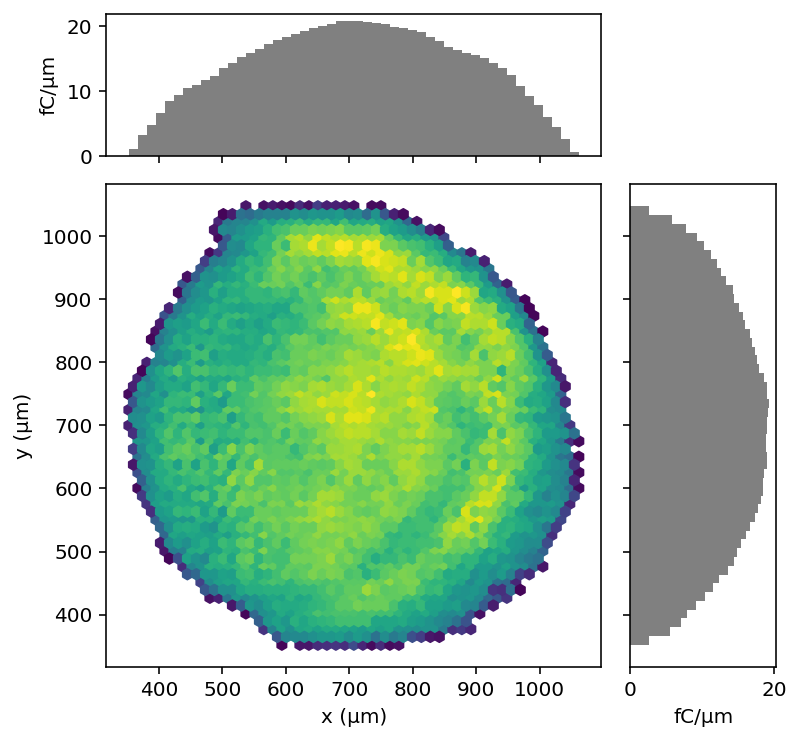

In [15]:
G.particles.plot('x', 'y', bins=50)

In [16]:
from impact import Impact

In [17]:
I = Impact('ImpactT.in', initial_particles=G.particles)

In [18]:
# Turn space charge off
I.total_charge = 0
I.stop = 0.5

In [19]:
I.run()

In [20]:
I.output.keys()

dict_keys(['run_info', 'stats', 'slice_info', 'particles'])

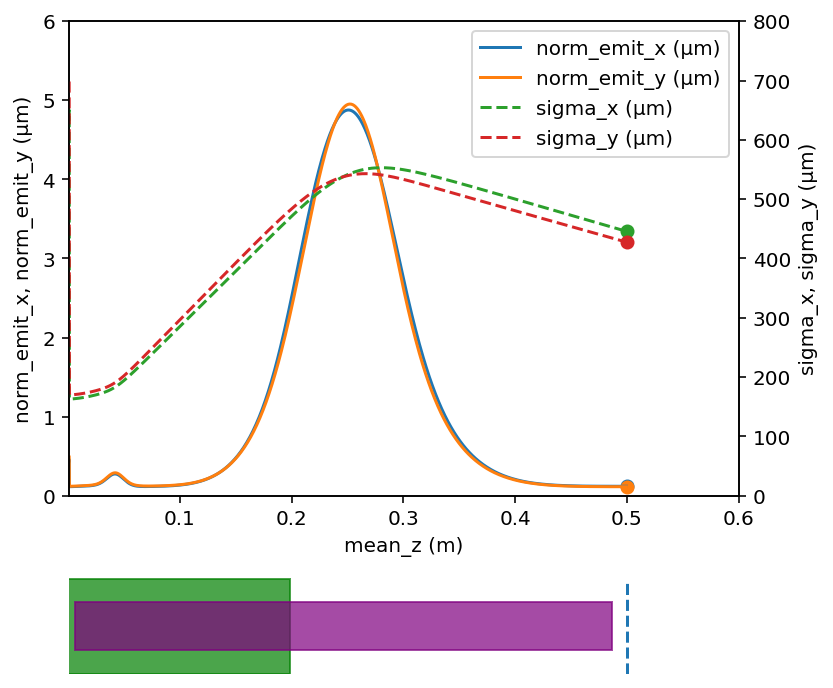

In [32]:
fig = I.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(1e-3,.6), ylim=(0, 6e-6), ylim2=(0, 800e-6),figsize=(6,6), return_figure=True)
#fig.axes[0].set_title('LUME-Impact')
plt.savefig('apex-gun-lume-impact.png', dpi=150, bbox_inches='tight')

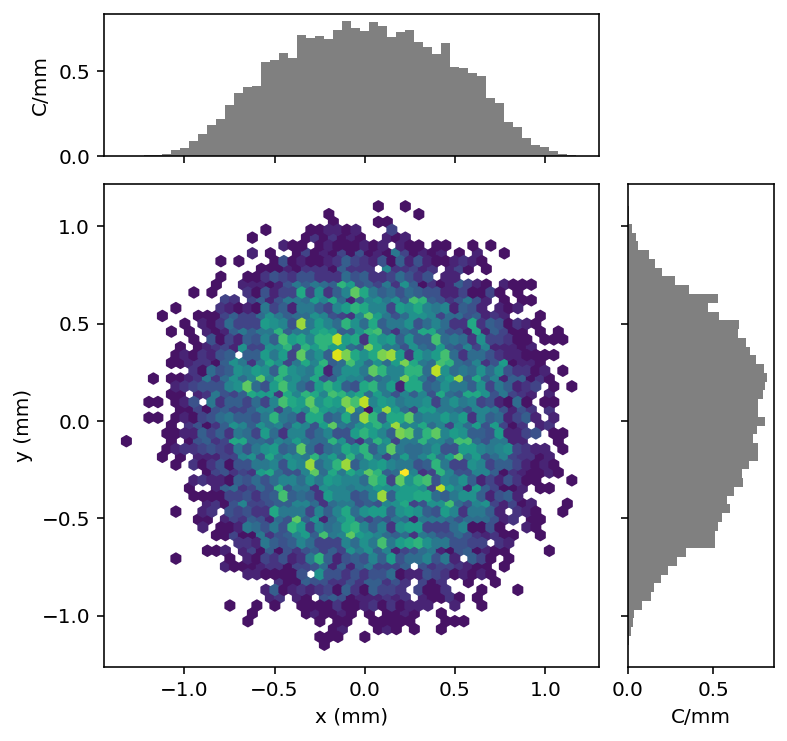

In [12]:
I.particles['final_particles'].plot('x', 'y', bins=50)

In [16]:
I.archive()

'impact_7915440a6365ec6b361c7970a812e9d0.h5'

In [14]:
!rm *h5

In [15]:
!pwd


/Users/chrisonian/Code/GitHub/lume-impact/templates/apex_gun
